<a href="https://colab.research.google.com/github/neto-riga/metodos_numericos_2/blob/main/10_metodo_de_minimos_cuadrados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## [Regresar al ínidce](https://github.com/neto-riga/metodos_numericos_2/blob/main/portafolio.md#índice)

# Ejercicio 10. Método de mínimos cuadrados.
---

El siguiente enlace contiene una tabla de datos con los registros de contagios de COVID en un periodo de tiempo. 

https://docs.google.com/spreadsheets/d/1yLoiAIga_YFEI5cXAJykZ6qkyIZI9dIU/edit#gid=1968576112

Ajustar los datos de un polinomio de mínimos cuadrados.

* Construir un modelo que describa el fenómeno para los tres casos.
* Emplear el método de mínimos cuadrados.
* Construir polinomios de diferentes grados, comprar e indicar cuál proporciona el mejor ajuste. 
* Elaborar la gráfica de los distintos polinomios.

## Construyendo el método

Primero declaramos las funciones y librerías para implementar el método

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sympy as sp
sns.set_theme(palette='colorblind')

In [ ]:
def suma(arr, grado):
  sum = 0
  for a in arr:
    sum += np.power(a, grado)
  return sum

In [ ]:
def poli_min_cuad(x, fx, grado):
  sis = np.zeros((grado+1, grado+1), dtype=np.float64)
  for i in range(grado+1):
    sis[0,i] = suma(x, i)
  for j in range(grado):
    sis[j+1,-1] = suma(x, j+ grado +1)
  for i in range(grado):
    for j in range(grado):
      sis[i+1, j] = sis[i, j+1]

  aum = np.zeros(grado+1, dtype=np.float128)
  for i in range(grado+1):
    for j in range(len(x)):
      aum[i] += fx[j] * x[j] ** i 
  return np.linalg.inv(sis) @ aum.reshape(grado+1,1)

In [ ]:
def poli(coef,val):
  pol = 0 
  for i in range(len(coef)):
    pol += coef[i] * (val**(i))
  return pol

## Extrayendo la información del Excel

Ahora pasamos el archivo del excel a un DataFrame para poder utilizar los datos.

In [ ]:
df = pd.read_csv("https://docs.google.com/spreadsheets/d/1yLoiAIga_YFEI5cXAJykZ6qkyIZI9dIU/export?format=csv", header=1, index_col=1)
df.head(3)

,Unnamed: 0,CdMx,EdoMex,Nacional
Día,,,,
1,NaN,144,149,748
2,NaN,141,154,736
3,NaN,147,147,737


In [ ]:
df2 = df.iloc[:,1:].copy()
df2.head(3)

,CdMx,EdoMex,Nacional
Día,,,
1,144,149,748
2,141,154,736
3,147,147,737


Declaramos los arreglos de los días y de cada entidad.

In [ ]:
x = df2.index.to_numpy()
cdmx = df2.CdMx.to_numpy()
edomex = df2.EdoMex.to_numpy()
nacional = df2.Nacional.to_numpy()

Obtenemos las coeficientes con un polinomio de grado 6 y de grado 12, ya que después de varias pruebas, estos fueron en los que encontramos mejores resultados y con los que podemos hacer una inspección inmediata de las diferencias entre los polinomios.

In [ ]:
sol_cdmx = poli_min_cuad(x, cdmx, 6)
sol_edomex = poli_min_cuad(x, edomex, 6)
sol_nacional = poli_min_cuad(x, nacional, 6)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in long_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in long_scalars
  


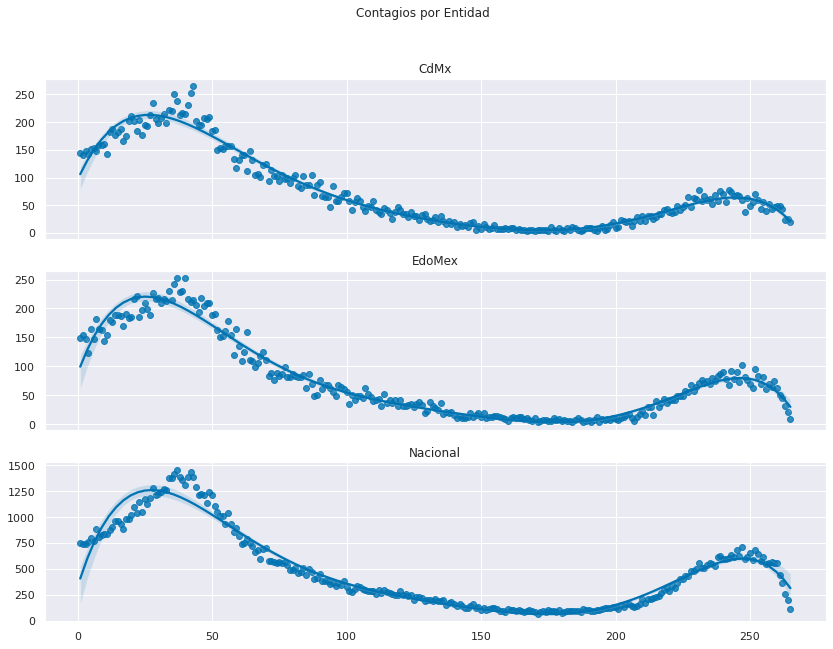

In [ ]:
from IPython.core.pylabtools import figsize
fig, ax = plt.subplots(3, 1, sharex=True, figsize=(14,10))
X = np.linspace(x[0], x[-13], 300)

fig.suptitle('Contagios por Entidad')

ax[0].set_title('CdMx')
sns.regplot(ax=ax[0], x=x, y=cdmx, order=6)
ax[1].set_title('EdoMex')
sns.regplot(ax=ax[1], x=x, y=edomex, order=6)
ax[2].set_title('Nacional')
sns.regplot(ax=ax[2], x=x, y=nacional, order=6)
plt.show()

In [ ]:
sol_cdmx = poli_min_cuad(x, cdmx, 12)
sol_edomex = poli_min_cuad(x, edomex, 12)
sol_nacional = poli_min_cuad(x, nacional, 12)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in long_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in long_scalars
  


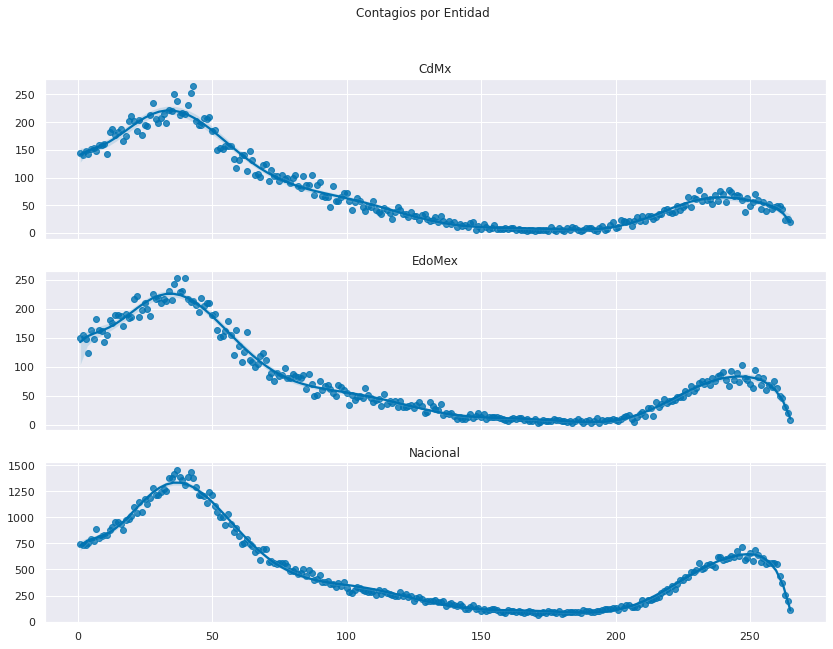

In [ ]:
from IPython.core.pylabtools import figsize
fig, ax = plt.subplots(3, 1, sharex=True, figsize=(14,10))
X = np.linspace(x[0], x[-13], 300)

fig.suptitle('Contagios por Entidad')

ax[0].set_title('CdMx')
sns.regplot(ax=ax[0], x=x, y=cdmx, order=12)
ax[1].set_title('EdoMex')
sns.regplot(ax=ax[1], x=x, y=edomex, order=12)
ax[2].set_title('Nacional')
sns.regplot(ax=ax[2], x=x, y=nacional, order=12)
plt.show()

## [Regresar al ínidce](https://github.com/neto-riga/metodos_numericos_2/blob/main/portafolio.md#índice)